In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, Model
from tensorflow.keras.applications import *
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [27]:
mnist=mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train/255
x_test=x_test/255

# Doing One-Hot Encoding
ytrain=to_categorical(y_train) 
ytest=to_categorical(y_test)


In [28]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(layers.Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 256)        

In [14]:

xtrain2=x_train.reshape(60000,28,28,1)
xtest2=x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
checkpoint=ModelCheckpoint('mnist_model_1.h5', monitor='val_loss', verbose=1, save_best_only=True)
tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1)
history=model.fit(xtrain2,ytrain,epochs=40,batch_size=1000,verbose=True,validation_data=(xtest2,ytest), callbacks=[checkpoint, tensorboard_callback])

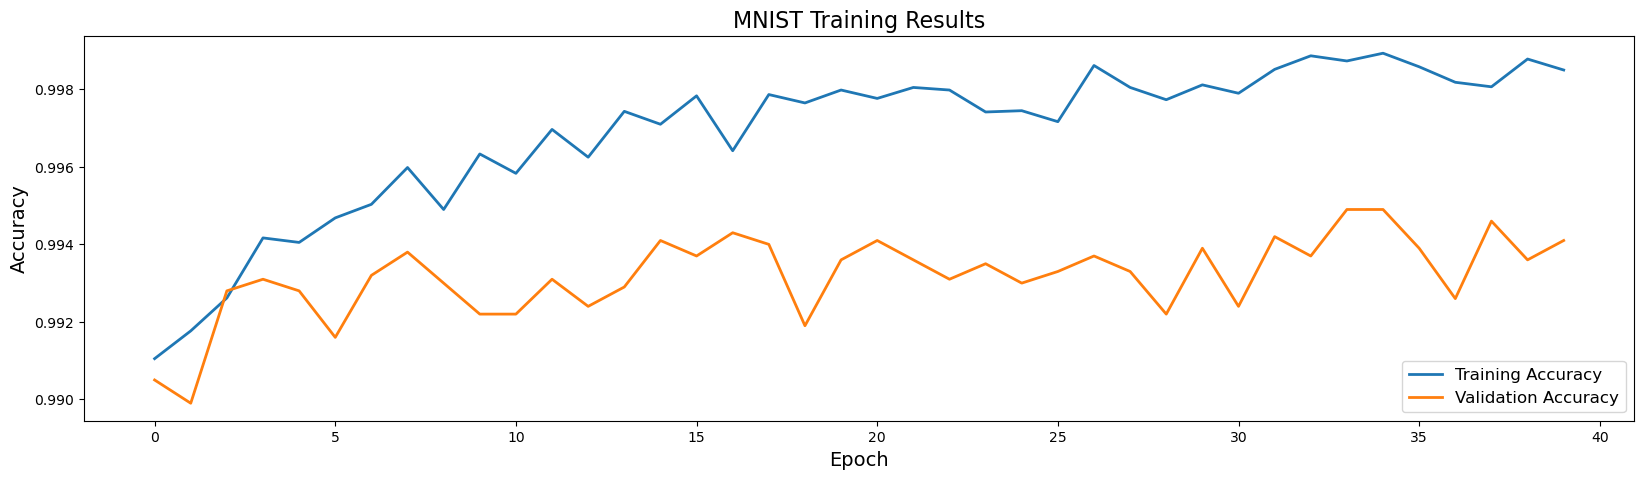

In [31]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(f"MNIST Training Results", fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()


In [19]:
test_loss, test_acc = model.evaluate(xtest2, ytest)
print("Testing accuracy:", test_acc*100,'%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0219 - accuracy: 0.9941
Testing accuracy: 99.40999746322632 %
